**Handwritten Digit Prediction - Classification Analysis**

The digits dataset comprises 8x8 pixel images representing handwritten digits. Each image is stored as an 8x8 array of grayscale values, allowing us to visualize the initial four images. Additionally, the dataset's target attribute holds the corresponding digit for each image, indicating what each image signifies.

**Import Library**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

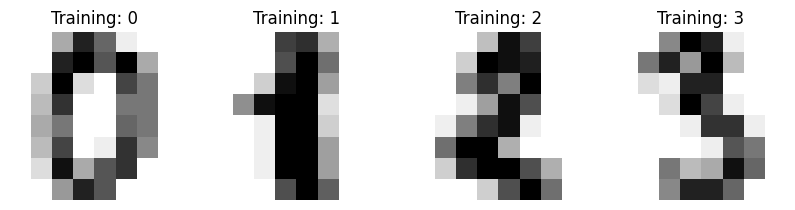

In [2]:
from sklearn.datasets import load_digits
df = load_digits()
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)


**Data Processing**

Flatten Image

In [4]:
df.images.shape

(1797, 8, 8)

In [5]:
df.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
df.images[0].shape

(8, 8)

In [7]:
len(df.images)

1797

In [9]:
n_sapmles = len(df.images)
data = df.images.reshape((n_sapmles, -1))


In [10]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [11]:
data[0].shape

(64,)

In [12]:
data.shape

(1797, 64)

**Scaling Image data**

In [13]:
data.min()

0.0

In [14]:
data.max()

16.0

In [15]:
data = data/16

In [16]:
data.min()

0.0

In [17]:
data.max()

1.0

In [18]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [21]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest model**

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
rf = RandomForestClassifier()

In [24]:
rf.fit(x_train, y_train)

RandomForestClassifier()

**Predict Test data**

In [26]:
y_pred = rf.predict(x_test)

In [27]:
y_pred

array([2, 2, 4, 4, 0, 1, 4, 0, 3, 5, 4, 5, 7, 2, 9, 2, 0, 0, 7, 2, 7, 2,
       7, 6, 4, 6, 5, 1, 1, 9, 0, 7, 3, 7, 2, 1, 9, 9, 5, 3, 4, 6, 0, 1,
       1, 7, 8, 8, 9, 1, 5, 8, 0, 0, 8, 8, 3, 0, 6, 5, 7, 4, 9, 3, 4, 7,
       5, 7, 9, 0, 7, 3, 0, 0, 3, 6, 4, 7, 8, 0, 3, 1, 8, 8, 6, 7, 3, 3,
       6, 6, 0, 5, 1, 2, 3, 3, 1, 5, 4, 9, 3, 1, 0, 9, 4, 7, 8, 3, 3, 8,
       7, 0, 8, 9, 3, 2, 9, 1, 5, 3, 5, 3, 1, 2, 2, 0, 7, 4, 2, 0, 0, 3,
       7, 1, 1, 3, 6, 4, 8, 9, 4, 0, 3, 9, 6, 5, 4, 4, 3, 9, 7, 5, 6, 5,
       6, 5, 5, 2, 0, 4, 1, 3, 3, 8, 4, 9, 4, 0, 4, 2, 9, 1, 1, 0, 2, 9,
       8, 5, 8, 7, 4, 0, 9, 6, 6, 8, 1, 9, 6, 7, 3, 2, 2, 1, 6, 5, 1, 4,
       1, 2, 0, 5, 8, 3, 8, 6, 2, 9, 9, 9, 6, 0, 8, 5, 3, 6, 0, 9, 4, 7,
       6, 7, 3, 4, 5, 6, 7, 8, 1, 1, 5, 9, 2, 6, 4, 1, 0, 2, 4, 0, 8, 6,
       7, 6, 9, 3, 7, 9, 0, 7, 7, 1, 0, 0, 1, 4, 2, 1, 9, 1, 3, 0, 6, 7,
       5, 5, 5, 7, 0, 6, 4, 2, 6, 2, 8, 4, 4, 5, 4, 2, 1, 1, 1, 7, 9, 9,
       6, 9, 0, 8, 3, 3, 5, 5, 8, 6, 2, 1, 1, 4, 3,

**Model Accuracy**

In [28]:
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
confusion_matrix(y_test, y_pred)

array([[56,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 60,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 57,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 43,  0,  0,  0,  1],
       [ 1,  0,  0,  0,  0,  1, 58,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 56,  0,  1],
       [ 0,  1,  2,  0,  0,  0,  0,  2, 45,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 49]])

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        56
           1       0.98      0.98      0.98        51
           2       0.97      1.00      0.98        60
           3       0.98      1.00      0.99        53
           4       0.98      1.00      0.99        57
           5       0.96      0.96      0.96        45
           6       1.00      0.95      0.97        61
           7       0.97      0.98      0.97        57
           8       0.98      0.90      0.94        50
           9       0.96      0.98      0.97        50

    accuracy                           0.98       540
   macro avg       0.98      0.97      0.97       540
weighted avg       0.98      0.98      0.98       540

